### **Importing Required Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### **Loading the data from CSV File**

In [0]:
data = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat",names=["Frequency","Angle of attack","Chord length","Free-steam velocity","Displacement thickness","sound pressure"])

### **Inspecting data**

In [45]:
data

,Frequency,Angle of attack,Chord length,Free-steam velocity,Displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


### **By looking at the above data:**
 1. Sound Pressure is the Target (which will be predicted after training)
 2. It is an estimation problem (continuous valued output)
 3. We have 5 Features 

### **Checking For Missing values**

In [46]:
data.isnull().values.any()

False

In [47]:
data.isnull().sum()

Frequency                 0
Angle of attack           0
Chord length              0
Free-steam velocity       0
Displacement thickness    0
sound pressure            0
dtype: int64

**No missing values found..**

### **Data Visualization**

In [0]:
x1 = data['Frequency'].values
x2 = data['Angle of attack'].values
x3 = data['Chord length'].values
x4 = data['Free-steam velocity'].values
x5 = data['Displacement thickness'].values
y = data['sound pressure'].values

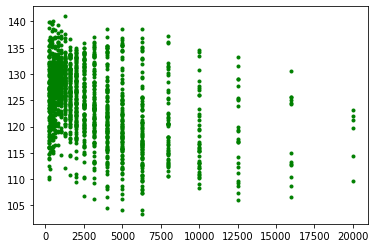

In [49]:
plt.plot(x1,y,'g.')

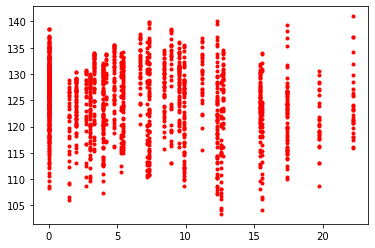

In [50]:
plt.plot(x2,y,'r.')

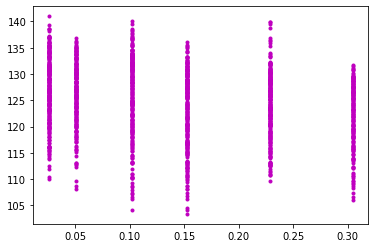

In [51]:
plt.plot(x3,y,'m.')

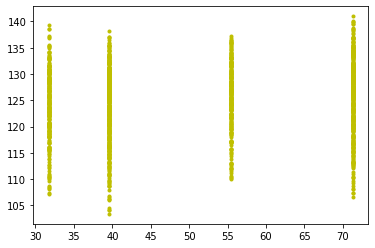

In [52]:
plt.plot(x4,y,'y.')

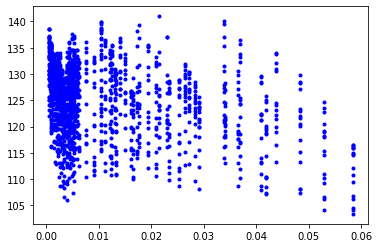

In [53]:
plt.plot(x5,y,'b.')

### **Feature Selection**



### **1.Using Pearson Correlation**

In [56]:
data.corr('pearson')['sound pressure']

Frequency                -0.390711
Angle of attack          -0.156108
Chord length             -0.236162
Free-steam velocity       0.125103
Displacement thickness   -0.312670
sound pressure            1.000000
Name: sound pressure, dtype: float64

**By doing the Pearson Correlation we can see that the features affecting the target are in the order:**
1. Frequency
2. Displacement thickness
3. Chord length 
4. Angle of attack 
5. Free-steam velocity

### **2.Using Heat Map**

Text(0.5, 1.0, 'Correlation Heatmap')

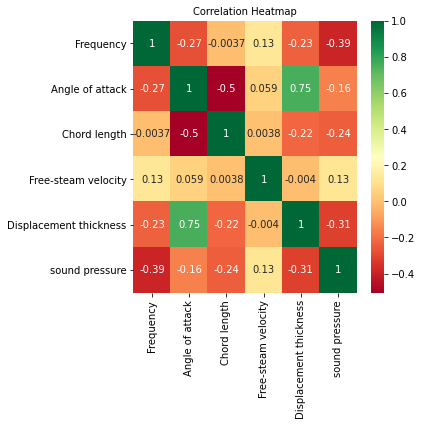

In [57]:
corr = data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap', fontsize=10)

### **3.Using PairPlot to understand Features better**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


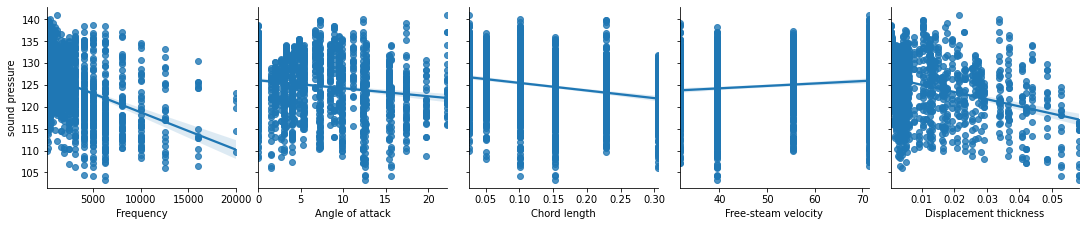

In [60]:
sns.pairplot(data=data, kind='reg', size = 3,
                  y_vars=['sound pressure'],
                  x_vars=['Frequency', 'Angle of attack', 'Chord length', 'Free-steam velocity', 'Displacement thickness'])